In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hang\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hang\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [58]:
df = pd.read_csv('costco.com Reviews.csv')
df.head()

,VENDOR NAME,PRODUCT URL,DESCRIPTION,RATING,TOTAL RATING,CUSTOMER NAME,COMMENT DURATION,TITLE,BODY REVIEW,RECOMMENDED,ANALYZE SENTIMENT,TOTAL FEEDBACK COUNT,Unnamed: 12
0,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Jenn,6 months ago,Great vanity!!!,Beautiful vanity. I got it in white. Arrived o...,Yes,Positive,3,NaN
1,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,BeachBiker,6 months ago,"Quality, Style, and a Great Price Too",This vanity is quality throughout. Beautiful q...,Yes,Positive,1,NaN
2,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,marla,4 months ago,Great Quality,Great quality vanity- very solid and well made...,Yes,Positive,1,NaN
3,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Preeti,5 days ago,Great Vanity if you do not mind black handles.,The cabinet is great with charging port and el...,Yes,Positive,0,NaN
4,COSTCO.COM,https://www.costco.com/hudson-black-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,Zimbie410,a month ago,Poor shipping services used.,Delivered half off pallet. Minor damage to pai...,No,Negative,0,NaN


In [59]:
df.shape

(1119, 13)

In [60]:
df.reset_index(inplace=True)
df

,index,VENDOR NAME,PRODUCT URL,DESCRIPTION,RATING,TOTAL RATING,CUSTOMER NAME,COMMENT DURATION,TITLE,BODY REVIEW,RECOMMENDED,ANALYZE SENTIMENT,TOTAL FEEDBACK COUNT,Unnamed: 12
0,0,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Jenn,6 months ago,Great vanity!!!,Beautiful vanity. I got it in white. Arrived o...,Yes,Positive,3,NaN
1,1,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,BeachBiker,6 months ago,"Quality, Style, and a Great Price Too",This vanity is quality throughout. Beautiful q...,Yes,Positive,1,NaN
2,2,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,marla,4 months ago,Great Quality,Great quality vanity- very solid and well made...,Yes,Positive,1,NaN
3,3,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Preeti,5 days ago,Great Vanity if you do not mind black handles.,The cabinet is great with charging port and el...,Yes,Positive,0,NaN
4,4,COSTCO.COM,https://www.costco.com/hudson-black-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,Zimbie410,a month ago,Poor shipping services used.,Delivered half off pallet. Minor damage to pai...,No,Negative,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1114,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,4.0,5.0,Jhhanson,2 years ago,Nice,Nice cabinet,âœ˜,Positive,0,NaN
1115,1115,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,4.0,5.0,NaN,3 years ago,Nice,Looks great.,âœ”,Positive,0,NaN
1116,1116,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,5.0,5.0,pete,8 months ago,quality,good quality,âœ”,Positive,0,NaN
1117,1117,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in Gray,5.0,5.0,Bill,2 years ago,Craftsmanship is great,Fantastic,âœ”,Positive,0,NaN


In [61]:
df['RATING'].value_counts()

5.0    725
4.0    166
1.0    101
3.0     85
2.0     41
Name: RATING, dtype: int64

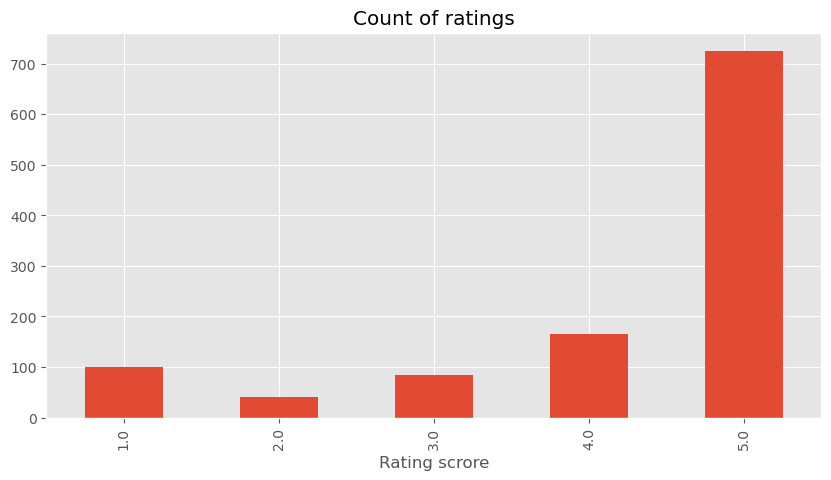

In [62]:
ax = df['RATING'].value_counts().sort_index().plot(kind='bar',title='Count of ratings', figsize=(10,5))
ax.set_xlabel('Rating scrore')
plt.show()

In [63]:
example = df['BODY REVIEW'] [50]
print(example)

I am really disappointed in the lack of quality control before the vanity got boxed and shipped. I would return the item if my contractor hadn't already installed it. The paint job is not good! The three upper drawers all have cracked paint around the inset. The diagonal cuts look terrible with the paint inconsistencies. I am trying to decide if I need to caulk then paint inside the cuts. Also, the powered shelf under the sink in the center had to be removed because the plumbing would not fit. The only benefit is the nice sink/vanity top. Otherwise, totally disappointed. I am going to call the manufacture to see if I can get new drawer and maybe cabinet faces.


In [64]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'am',
 'really',
 'disappointed',
 'in',
 'the',
 'lack',
 'of',
 'quality',
 'control']

In [65]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('really', 'RB'),
 ('disappointed', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('quality', 'NN'),
 ('control', 'NN')]

In [66]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  am/VBP
  really/RB
  disappointed/VBN
  in/IN
  the/DT
  lack/NN
  of/IN
  quality/NN
  control/NN
  before/IN
  the/DT
  vanity/NN
  got/VBD
  boxed/JJ
  and/CC
  shipped/VBD
  ./.
  I/PRP
  would/MD
  return/VB
  the/DT
  item/NN
  if/IN
  my/PRP$
  contractor/NN
  had/VBD
  n't/RB
  already/RB
  installed/VB
  it/PRP
  ./.
  The/DT
  paint/NN
  job/NN
  is/VBZ
  not/RB
  good/JJ
  !/.
  The/DT
  three/CD
  upper/JJ
  drawers/NNS
  all/DT
  have/VBP
  cracked/VBN
  paint/NN
  around/IN
  the/DT
  inset/NN
  ./.
  The/DT
  diagonal/JJ
  cuts/NNS
  look/VBP
  terrible/JJ
  with/IN
  the/DT
  paint/NN
  inconsistencies/NNS
  ./.
  I/PRP
  am/VBP
  trying/VBG
  to/TO
  decide/VB
  if/IN
  I/PRP
  need/VBP
  to/TO
  caulk/VB
  then/RB
  paint/NN
  inside/IN
  the/DT
  cuts/NNS
  ./.
  Also/RB
  ,/,
  the/DT
  powered/VBN
  shelf/NN
  under/IN
  the/DT
  sink/NN
  in/IN
  the/DT
  center/NN
  had/VBD
  to/TO
  be/VB
  removed/VBN
  because/IN
  the/DT
  plumbing/NN
  would/MD


In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [68]:
sia.polarity_scores(example)

{'neg': 0.175, 'neu': 0.768, 'pos': 0.057, 'compound': -0.9286}

In [69]:
#Run the polarity score on entire dataset
result = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    body_review = str(row['BODY REVIEW'])
    index = row['index']
    result[index] = sia.polarity_scores(body_review)
    

  0%|          | 0/1119 [00:00<?, ?it/s]

In [70]:
vaders = pd.DataFrame(result).T
print(vaders)

        neg    neu    pos  compound
0     0.068  0.597  0.335    0.9762
1     0.047  0.739  0.214    0.7783
2     0.103  0.707  0.191    0.5936
3     0.026  0.723  0.251    0.9382
4     0.138  0.862  0.000   -0.4939
...     ...    ...    ...       ...
1114  0.000  0.263  0.737    0.4215
1115  0.000  0.196  0.804    0.6249
1116  0.000  0.256  0.744    0.4404
1117  0.000  0.000  1.000    0.5574
1118  0.000  1.000  0.000    0.0000

[1119 rows x 4 columns]


In [71]:
vaders.to_csv('output2.csv',index=True)

In [72]:
df.to_csv('CostcoUsReview.csv', index=True)

In [73]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
print(vaders)

        Id    neg    neu    pos  compound
0        0  0.068  0.597  0.335    0.9762
1        1  0.047  0.739  0.214    0.7783
2        2  0.103  0.707  0.191    0.5936
3        3  0.026  0.723  0.251    0.9382
4        4  0.138  0.862  0.000   -0.4939
...    ...    ...    ...    ...       ...
1114  1114  0.000  0.263  0.737    0.4215
1115  1115  0.000  0.196  0.804    0.6249
1116  1116  0.000  0.256  0.744    0.4404
1117  1117  0.000  0.000  1.000    0.5574
1118  1118  0.000  1.000  0.000    0.0000

[1119 rows x 5 columns]


In [74]:
vaders = vaders.merge(df, how='left', left_on='Id', right_on='index')

In [75]:
vaders

,Id,neg,neu,pos,compound,index,VENDOR NAME,PRODUCT URL,DESCRIPTION,RATING,TOTAL RATING,CUSTOMER NAME,COMMENT DURATION,TITLE,BODY REVIEW,RECOMMENDED,ANALYZE SENTIMENT,TOTAL FEEDBACK COUNT,Unnamed: 12
0,0,0.068,0.597,0.335,0.9762,0,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Jenn,6 months ago,Great vanity!!!,Beautiful vanity. I got it in white. Arrived o...,Yes,Positive,3,NaN
1,1,0.047,0.739,0.214,0.7783,1,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,BeachBiker,6 months ago,"Quality, Style, and a Great Price Too",This vanity is quality throughout. Beautiful q...,Yes,Positive,1,NaN
2,2,0.103,0.707,0.191,0.5936,2,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,marla,4 months ago,Great Quality,Great quality vanity- very solid and well made...,Yes,Positive,1,NaN
3,3,0.026,0.723,0.251,0.9382,3,COSTCO.COM,https://www.costco.com/hudson-white-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,5.0,5.0,Preeti,5 days ago,Great Vanity if you do not mind black handles.,The cabinet is great with charging port and el...,Yes,Positive,0,NaN
4,4,0.138,0.862,0.000,-0.4939,4,COSTCO.COM,https://www.costco.com/hudson-black-bath-vanit...,Hudson White Bath Vanity by Studio Bathe,4.0,5.0,Zimbie410,a month ago,Poor shipping services used.,Delivered half off pallet. Minor damage to pai...,No,Negative,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1114,0.000,0.263,0.737,0.4215,1114,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,4.0,5.0,Jhhanson,2 years ago,Nice,Nice cabinet,âœ˜,Positive,0,NaN
1115,1115,0.000,0.196,0.804,0.6249,1115,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,4.0,5.0,NaN,3 years ago,Nice,Looks great.,âœ”,Positive,0,NaN
1116,1116,0.000,0.256,0.744,0.4404,1116,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in White,5.0,5.0,pete,8 months ago,quality,good quality,âœ”,Positive,0,NaN
1117,1117,0.000,0.000,1.000,0.5574,1117,COSTCO.COM,https://www.costco.com/calais-bath-vanity-by-s...,Calais Bath Vanity by Studio Bathe in Gray,5.0,5.0,Bill,2 years ago,Craftsmanship is great,Fantastic,âœ”,Positive,0,NaN


In [ ]:
ax = sns.barplot(data=vaders, x='RATING', y='compound')
ax.set_title('Compound Score')
plt.show()

In [76]:
vaders.to_csv('Merged file.csv',index=True)

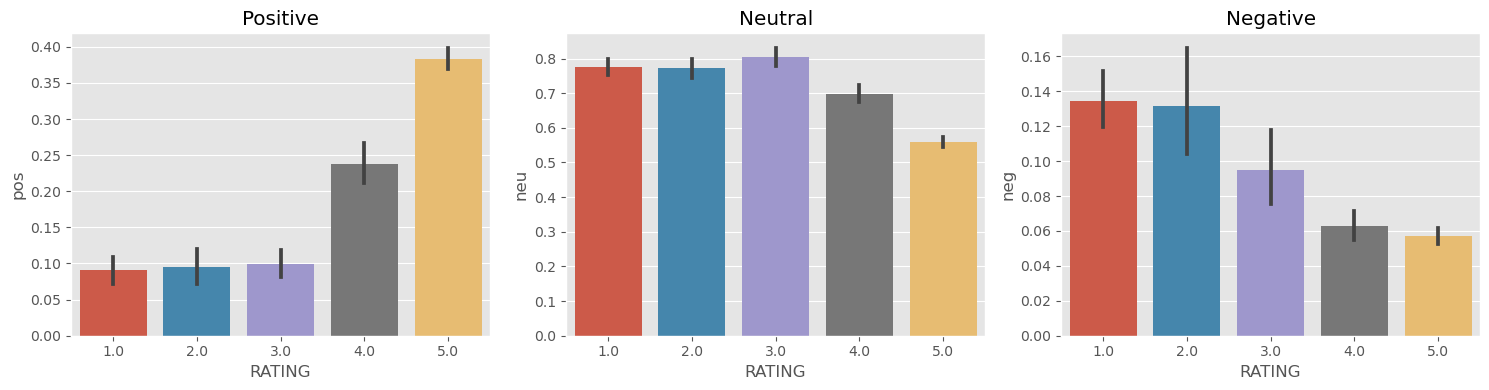

In [77]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
sns.barplot(data=vaders, x='RATING', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='RATING', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='RATING', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()